# Global Alignment and Hierarchical Clustering of ACE2 Orthologs

## Primary Authors:
- Go, Daphne Janelyn
- Gilo, Joshua
- Lasala, Kyle Carlo

## Objectives: 
To compare ACE2 orthologs by performing pairwise sequence alignments and computing a distance-based hierarchical clustering.

# The Renin–Angiotensin–Aldosterone System (RAAS)
## RAAS: Function and Biological Purpose
The renin–angiotensin–aldosterone system (RAAS) is a hormonal signaling cascade that regulates blood pressure, fluid volume, and electrolyte balance in the body. It is a key homeostatic mechanism that activates when blood pressure is low to restore it [1].


### The Classical Model of the RAAS Pathway
A figure from [1] illustrating the classical view of the Renin-Angiotensin System is shown below:

![RAAS](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41371-020-00459-3/MediaObjects/41371_2020_459_Fig1_HTML.png?as=webp)

1. **Renin**, an enzyme from the kidney, converts angiotensinogen (from the liver) into **angiotensin I**
2. **Angiotensin-Coverting Enzyme (ACE)** then cleaves angiotensin I into **angiotensin II (Ang II)**
3. **Angiotensin II** is the main effector of the RAAS. This binds to the **angiotensin type 1 receptor** to raise blood pressure by causing the narrowing of blood vessels, stimulating aldosterone release (promoting sodium and water retention), and by activating the sympathetic nervous system.

The RAAS has two key pathways. The ACE pathway converts Ang I to Ang II, which binds to the AT1 receptor, raising blood pressure and promoting inflammation. In contrast, the ACE2 pathway converts Ang II into Ang-(1–7), which binds to the Mas receptor to lower blood pressure and reduce inflammation. The balance between these two pathways plays a crucial role in both acute and chronic diseases. Medications like ACE inhibitors and ARBs help by shifting the system toward the protective ACE2–Ang-(1–7) pathway [1][2].

# ACE2 and COVID-19

In 2003, ACE2 primarily gained more attention beyond its physiology when it was identified as the entry receptor for the SARS coronavirus (SARS-COV). This was also discovered during the first coronavirus epidemic caused by SARS-CoV. In 2020, during the COVID-19 pandemic, it was identified that **SARS-COV-2** also uses ACE2 as its mechanism of viral entry into human cells.  SARS-CoV-2 binds to ACE2 with a remarkably higher affinity, specifically 10–20-fold higher, compared to SARS-CoV. The ACE2 receptor is also primarily found on the epithelial tissue of the lungs [2].

## Mechanism of Viral Entry
Binding to the ACE2 receptor is only the first step in the viral entry process. As identified by Lan et al. (2020) [3], successful entry of SARS-CoV-2 also requires the cleavage of the viral Spike (S) protein by host cell proteases.

1. Binding: The viral Spike (S) protein binds to the ACE2 receptor on the surface of the host cell.

2. Priming Cleavage by Furin: During virus production, the Spike protein is cleaved at its furin cleavage site by the host enzyme furin, which prepares the virus for entry.

3. Activation Cleavage at S2′ Site: After binding to ACE2, host cell proteases (e.g., TMPRSS2) cleave the Spike at the S2′ site, activating the Spike's fusion machinery.

4. Membrane Fusion: The activated Spike exposes its fusion peptide, which inserts into the host cell membrane. A structural refolding follows, pulling  the viral and host membranes together and allowing the viral genome to enter the cytoplasm.


# Working Question
With the affinity of the SARS-CoV-2 Spike protein for human ACE2, we aim to analyze **which animal species are also susceptible to infection by SARS-CoV-2.** By analyzing the similarity between the ACE2 orthologs of various vertebrates and the human ACE2 protein, we can infer their potential as hosts for the virus. This python notebook aims to replicate the studies of Li et al (2020) [4] and Liu et al (2021) [5] using a subset of only 10 verterbrates.

[1] Fountain JH, Kaur J, Lappin SL. Physiology, Renin Angiotensin System. [Updated 2023 Mar 12]. In: StatPearls. Treasure Island (FL): StatPearls Publishing; 2025 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK470410/

[2] Bhalla, V., Blish, C.A. & South, A.M. A historical perspective on ACE2 in the COVID-19 era. J Hum Hypertens 35, 935–939 (2021). https://doi.org/10.1038/s41371-020-00459-3

[3] Lan, J., Ge, J., Yu, J. et al. Structure of the SARS-CoV-2 spike receptor-binding domain bound to the ACE2 receptor. Nature 581, 215–220 (2020). https://doi.org/10.1038/s41586-020-2180-5

[4] Li Y, Wang H, Tang X, Fang S, Ma D, Du CWang Y, Pan HYao WZhang R, Zou X, Zheng J, Xu L, Farzan M, Zhong G 2020. SARS-CoV-2 and Three Related Coronaviruses Utilize Multiple ACE2 Orthologs and Are Potently Blocked by an Improved ACE2-Ig. J Virol 94:10.1128/jvi.01283-20.
https://doi.org/10.1128/jvi.01283-20

[5] Liu, Y., Hu, G., Wang, Y., Ren, W., Zhao, X., Ji, F., Zhu, Y., Feng, F., Gong, M., Ju, X., Zhu, Y., Cai, X., Lan, J., Guo, J., Xie, M., Dong, L., Zhu, Z., Na, J., Wu, J., Lan, X., … Ding, Q. (2021). Functional and genetic analysis of viral receptor ACE2 orthologs reveals a broad potential host range of SARS-CoV-2. Proceedings of the National Academy of Sciences of the United States of America, 118(12), e2025373118. https://doi.org/10.1073/pnas.2025373118

## Prerequisites: Importing the libraries and downloading the necessary data.

In [2]:
import os
import math
import numpy as np
import pathlib
import seaborn as sns

from Bio import Entrez
from Bio import SeqIO
from Bio.Align import PairwiseAligner, substitution_matrices
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Organisms are retrieved from the supplementary data containing the accession numbers of the organisms analyzed by [1]. The list of accession numbers are shown in the following table. Only 11 verterbrates will be retrieved inclusive of the human ortholog.

| ID | Species | Common Name | NCBI Accession |
|:---|:---|:---|:---|
| #1 | Homo sapiens | Human | NP_001358344.1 |
| #2 | Pan troglodytes | Chimpanzee | XP_016798468.1 |
| | Pan paniscus | Pygmy chimpanzee | XP_008972428.1 |
| #3 | Gorilla gorilla gorilla | Western lowland gorilla | NP_018874749.1 |
| #4 | Nomascus leucogenys | Northern white-cheeked gibbon | XP_003261132.2 |
| #5 | Pongo abelii | Sumatran orangutan | NP_001124604.1 |
| #6 | Macaca mulatta | Rhesus monkey | NP_001129168.1 |
| | Macaca fascicularis | Crab-eating macaque | XP_005593094.1 |
| | Macaca nemestrina | Pig-tailed macaque | XP_011733505.1 |
| | Cercocebus atys | Sooty mangabey | XP_011891198.1 |
| | Mandrillus leucophaeus | Drill | XP_011850923.1 |
| #7 | Papio anubis | Olive baboon | XP_021788732.1 |
| #8 | Theropithecus gelada | Gelada | XP_025227847.1 |
| | Chlorocebus sabaeus | Green monkey | XP_007989304.1 |
| #9 | Rhinopithecus roxellana | Golden snub-nosed monkey | XP_010364367.2 |
| #10 | Piliocolobus tephrosceles | Ugandan red Colobus | XP_023054821.1 |
| #11 | Callithrix jacchus | white-tufted-ear marmoset | XP_008987241.1 |
| #12 | Sapajus apella | Tufted capuchin | XP_032141854.1 |
| | Cebus capucinus imitator | White-headed Capuchin | XP_017367865.1 |
| | Aotus nancymaae | Nancy Ma's Night Monkey | XP_012290105.1 |
| #13 | Saimiri boliviensis boliviensis | Bolivian squirrel monkey | XP_010334925.1 |
| | Propithecus coquereli | (Coquerel's sifaka)monkey | XP_012494185.1 |
| #14 | Oryctolagus cuniculus | Rabbit | XP_002719891.1 |
| | Ochotona princeps | American pika | XP_004597549.2 |
| | Mesocricetus auratus | Golden hamster | XP_005074266.1 |
| #15 | Cricetulus griseus | Chinese hamster | XP_003503283.1 |
| #16 | Peromyscus leucopus | White-footed mouse | XP_028743609.1 |
| | Peromyscus maniculatus bairdii | Prairie Deer Mouse | XP_006973269.1 |
| #18 | Jaculus jaculus | Lesser Egyptian jerboa | XP_004671523.1 |
| #19 | Ictidomys tridecemlineatus | Thirteen-lined ground squirrel | XP_005316051.3 |
| #20 | Sus scrofa | Pig | NP_001116542.1 |
| #21 | Globicephala melas | Long-finned pilot whale | XP_030703991.1 |
| | Lagenorhynchus obliquidens | Pacific white-sided dolphin | XP_026951598.1 |
| #22 | Orcinus orca | Killer whale | XP_004269705.1 |
| #23 | Tursiops truncatus | Common bottlenose dolphin | XP_019781177.1 |
| #24 | Delphinapterus leucas | Beluga whale | XP_022418360.1 |
| | Monodon monoceros | Narwhal | XP_029095804.1 |
| #25 | Neophocaena asiaeorientalis asiaeorientalis | Finless Porpoise | XP_024599894.1 |
| #26 | Lipotes vexillifer | Yangtze River dolphin | XP_007466389.1 |
| #27 | Physeter catodon | Sperm whale | XP_023971279.1 |
| | Balaenoptera acutorostrata scammoni | Minke Whale | XP_028020351.1 |
| #28 | Bos taurus | Cattle | XP_005228485.1 |
| | Bos indicus | Bos taurus indicus | XP_019811719.1 |
| | Bos indicus x Bos taurus | Hybrid cattle | XP_027389727.1 |
| | Bison bison bison | American plain bison | XP_010833001.1 |
| | Odocoileus virginianus texanus | White-tailed fawns | XP_020768965.1 |
| #29 | Bos mutus | Wild yak | XP_005903173.1 |
| #30 | Bubalus bubalis | Water buffalo | XP_006041602.1 |
| #31 | Ovis aries | Sheep | XP_011961657.1 |
| #32 | Capra hircus | Goat | NP_001277036.1 |
| #33 | Rousettus aegyptiacus | Egyptian rousette | XP_015974412.1 |
| | Vombatus ursinus | Common wombat | XP_027691156.1 |
| #34 | Phascolarctos cinereus | Koala | XP_020863153.1 |
| | Trichechus manatus latirostris | Florida manatee | XP_004386381.1 |
| #35 | Equus caballus | Horse | XP_001490241.1 |
| | Equus przewalskii | Przewalski's horse | XP_008542995.1 |
| | Equus asinus | Ass | XP_014713133.1 |
| #36 | Ceratotherium simum simum | Southern white rhinoceros | XP_004435206.1 |
| #37 | Canis lupus familiaris | Dog | NP_001158732.1 |
| | Canis lupus dingo | Dingo dog | XP_025292925.1 |
| #38 | Vulpes vulpes | Red fox | XP_025842512.1 |
| #39 | Ailuropoda melanoleuca | Giant panda | XP_002930657.1 |
| | Ursus maritimus | Polar bear | XP_008694637.1 |
| #40 | Ursus arctos horribilis | Bear | XP_026333865.1 |
| #41 | Zalophus californianus | California sea lion | XP_027465353.1 |
| #42 | Eumetopias jubatus | Steller sea lion | XP_027970822.1 |
| | Callorhinus ursinus | Northern fur seal | XP_025713397.1 |
| | Odobenus rosmarus divergens | Pacific walrus | XP_004415448.1 |
| | Phoca vitulina | Harbor seal | XP_032245506.1 |
| #43 | Neomonachus schauinslandi | Hawaiian monk seal | XP_021536480.1 |
| #44 | Mustela putorius furo | Domestic ferret | NP_001297119.1 |
| | Mustela erminea | Stoat | XP_032187677.1 |
| | Enhydra lutris kenyoni | Sea Otter | XP_022374078.1 |
| #45 | Felis catus | Domestic cat | XP_023104564.1 |
| #46 | Lynx canadensis | Canada lynx | XP_030160839.1 |
| #47 | Acinonyx jubatus | Cheetah | XP_026910297.1 |
| | Puma concolor | Puma | XP_025790417.1 |
| #48 | Panthera pardus | Leopard | XP_019273508.1 |
| | Panthera tigris altaica | Amur tiger | XP_007090142.1 |
| #49 | Manis javanica | Malayan pangolin | XP_017505746.1 |

[1] Liu, Y., Hu, G., Wang, Y., Ren, W., Zhao, X., Ji, F., Zhu, Y., Feng, F., Gong, M., Ju, X., Zhu, Y., Cai, X., Lan, J., Guo, J., Xie, M., Dong, L., Zhu, Z., Na, J., Wu, J., Lan, X., … Ding, Q. (2021). Functional and genetic analysis of viral receptor ACE2 orthologs reveals a broad potential host range of SARS-CoV-2. Proceedings of the National Academy of Sciences of the United States of America, 118(12), e2025373118. https://doi.org/10.1073/pnas.2025373118

### Download the ACE2 proteins of the selected organisms

Selected Organisms along with the NCBI accession numbers

In [3]:
accession_dict = {
    "Homo sapiens (Human)": "NP_001358344.1",
    "Pan troglodytes (Chimpanzee)": "XP_016798468.1",
    "Callithrix jacchus (Marmoset)": "XP_008987241.1",
    "Felis catus (Cat)": "XP_023104564.1",
    "Canis lupus familiaris (Dog)": "NP_001158732.1",
    "Mustela putorius furo (ferret)": "NP_001297119.1",
    "Rousettus aegyptiacus (Bat)": "XP_015974412.1",
    "Manis javanica (Pangolin)": "XP_017505746.1",
    "Sus scrofa (Pig)": "NP_001116542.1",
    "Peromyscus leucopus(Mouse)": "XP_028743609.1",
    "Bos taurus (Cattle)": "XP_005228485.1",
}

Download the ACE2 protein sequences

In [4]:
fasta_file = "ace2_orthologs.fasta"
accession_vals = list(accession_dict.values())

try:
    handle = Entrez.efetch(db="protein", id=accession_vals, rettype="fasta", retmode="text", email="abc@efg.com")
    data = handle.read()
    handle.close()
    pathlib.Path(fasta_file).write_text(data)
    print(f"Saved fasta file to {fasta_file}")
except Exception as e:
    print(f"Errror occured: {e}")

Saved fasta file to ace2_orthologs.fasta


### Read the downloaded ACE2 protein sequences of the selected organisms

In [5]:
fasta_filename = "ace2_orthologs.fasta"
sequences_dict = {}
try:
    with open(fasta_filename, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            common_name = None
            for name, acc in accession_dict.items():
                if acc in record.id:
                    common_name = name
                    break
            if common_name:
                record.id = common_name
                record.description = f"{common_name} ACE2"
                sequences_dict[common_name] = record

    print(">>> Successfully loaded sequences from file. Verification:")
    print("---------------------------------------------------------")
    for name, record in sequences_dict.items():
        print(f"  - {name:<12} ({accession_dict[name]}): {len(record.seq)} amino acids")
    print("---------------------------------------------------------")

except FileNotFoundError:
    print(f"Error: The file '{fasta_filename}' was not found. Please run the download step again.")

>>> Successfully loaded sequences from file. Verification:
---------------------------------------------------------
  - Homo sapiens (Human) (NP_001358344.1): 805 amino acids
  - Pan troglodytes (Chimpanzee) (XP_016798468.1): 805 amino acids
  - Callithrix jacchus (Marmoset) (XP_008987241.1): 805 amino acids
  - Felis catus (Cat) (XP_023104564.1): 807 amino acids
  - Canis lupus familiaris (Dog) (NP_001158732.1): 804 amino acids
  - Mustela putorius furo (ferret) (NP_001297119.1): 805 amino acids
  - Rousettus aegyptiacus (Bat) (XP_015974412.1): 805 amino acids
  - Manis javanica (Pangolin) (XP_017505746.1): 805 amino acids
  - Sus scrofa (Pig) (NP_001116542.1): 805 amino acids
  - Peromyscus leucopus(Mouse) (XP_028743609.1): 805 amino acids
  - Bos taurus (Cattle) (XP_005228485.1): 811 amino acids
---------------------------------------------------------


## Pairwise Alignment using Needleman-Wunsch Algorithm

#### BLOSUM62 as the Scoring System 

According to NCBI [1], BLOSUM62 is the best general scoring system for protein alignment. This corresponds to the empirical results of Altschul [2] and identifies that BLOSUM62 must use an affine gap penalty of 5 and 3 for open and extend, respectively.

[1] NCBI (n.d.) *BLAST Scoring and Statistics.* https://www.nlm.nih.gov/ncbi/workshops/2023-08_BLAST_evol/blast_score.html

[2] Altschul S.F. (2002) *Empirical determination of effective gap penalties for sequence comparison.* **Bioinformatics** 18 (11): 1500‑1507.

Construct the `aligner` object using the `PairwiseAligner` from the `Biopython` library. 

In [6]:
aligner = PairwiseAligner()
aligner.mode = 'global'
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
aligner.open_gap_score = -5
aligner.extend_gap_score = -3

Function that compares the ACE2 protein sequences of Human to other organisms

In [7]:
def get_best_alignment(aligner, seq1, seq2):
    return aligner.align(seq1, seq2)[0]

def extract_key_residues(aligned_human, aligned_other, key_positions):
    ungapped_to_aln = [i for i, c in enumerate(aligned_human) if c != '-']
    residues = {}
    for pos in key_positions:
        if pos - 1 < len(ungapped_to_aln):
            aln_idx = ungapped_to_aln[pos - 1]
            residues[pos] = aligned_other[aln_idx]
        else:
            residues[pos] = '-'
    return residues

def analyze_against_human(sequences, aligner, human_key, key_positions):
    human_seq = sequences[human_key].seq
    alignment_scores = {}
    key_residues = {}
    alignments_dict = {}

    for name, record in sequences.items():
        if name == human_key: 
            continue
        aln = get_best_alignment(aligner, human_seq, record.seq)
        alignments_dict[name] = aln
        h_aln, o_aln = aln[0], aln[1]
        alignment_scores[name] = aln.score
        key_residues[name] = extract_key_residues(h_aln, o_aln, key_positions)

    return alignment_scores, key_residues, alignments_dict

Align the ACE2 protein sequences of Human to other organisms.

In [8]:
KEY_POSITIONS = [31, 35, 38, 41, 42, 82, 353]
HUMAN_NAME = "Homo sapiens (Human)"
alignment_scores, key_residues, alignments_dict = analyze_against_human(sequences_dict, aligner, HUMAN_NAME, KEY_POSITIONS)
print("All pairwise alignments complete")

All pairwise alignments complete


Alignment scores and identity

In [9]:
print("-" * 40)
print(f"{'Species':<30} | {'Score':>7} ")
print("-" * 40)

for name, (score) in alignment_scores.items():
    print(f"{name:<30} | {score:7.1f} ")

print(f"{'Human':<30} | {'-':>7} ")

----------------------------------------
Species                        |   Score 
----------------------------------------
Pan troglodytes (Chimpanzee)   |  4253.0 
Callithrix jacchus (Marmoset)  |  3957.0 
Felis catus (Cat)              |  3697.0 
Canis lupus familiaris (Dog)   |  3639.0 
Mustela putorius furo (ferret) |  3629.0 
Rousettus aegyptiacus (Bat)    |  3482.0 
Manis javanica (Pangolin)      |  3679.0 
Sus scrofa (Pig)               |  3567.0 
Peromyscus leucopus(Mouse)     |  3633.0 
Bos taurus (Cattle)            |  3441.0 
Human                          |       - 


### Significance of ACE2 Positions

According to Liu et al. (2021) [1], ACE2 orthologs from the 295 species contain the relevant amino acid residues at positions 31, 35, 38, 82 and 353. These positions are critical for SARS-CoV-2 spike binding. These residues form two distinct virus-binding hotspots on the ACE2 protein: the 31K hotspot and the 353K hotspot, which provide a substantial amount of energy to the virus-receptor binding interactions.

**Hotspot 31K**
- Key residues: K31, E35, M82
- This region forms a salt bridge between K31 and E35. A salt bridge is a type of non-covalent interaction that happens between two oppositely charged amino acids in a protein, which contribute to protein structure, and stability.
- The 31K hotspot is further stabilized by Methionine (M) at position 82 of human ACE2. M82 achieves this stabilization through a hydrophobic interaction with Phenylalanine (F) at position 486 of the SARS-CoV-2 Receptor-Binding Domain (RBD).

**Hotspot 353K**
- Key residues: K353, D38
- Located in a loop region of ACE2, K353 forms another salt bridge with D38

Positions 41 and 42 were also of interest because they form critical hydrogen bonds with the SARS-CoV-2 spike protein.

[1] Liu, Y., Hu, G., Wang, Y., Ren, W., Zhao, X., Ji, F., Zhu, Y., Feng, F., Gong, M., Ju, X., Zhu, Y., Cai, X., Lan, J., Guo, J., Xie, M., Dong, L., Zhu, Z., Na, J., Wu, J., Lan, X., … Ding, Q. (2021). Functional and genetic analysis of viral receptor ACE2 orthologs reveals a broad potential host range of SARS-CoV-2. Proceedings of the National Academy of Sciences of the United States of America, 118(12), e2025373118. https://doi.org/10.1073/pnas.2025373118

### Key Residues

In [10]:
human_record = sequences_dict[HUMAN_NAME]
print("-" *100)
print(f"{'Species':<30} | {'Pos 31':>7} | {'Pos 35':>7} | {'Pos 38':>7} | {'Pos 41':>7} | {'Pos 42':>7} | {'Pos 82':>7} | {'Pos 353':>7}")
print("-" * 100)

for name, residues in key_residues.items():
    print(f"{name:<30}"
          + "".join(f" | {residues.get(pos, '-'):>7}" for pos in [31, 35, 38, 41, 42, 82, 353]))

print(f"{'Human':<30}"
      + f" | {human_record.seq[30]:>7} | {human_record.seq[34]:>7} | {human_record.seq[37]:>7} | {human_record.seq[40]:>7}"
      + f" | {human_record.seq[41]:>7} | {human_record.seq[81]:>7} | {human_record.seq[352]:>7}")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Species                        |  Pos 31 |  Pos 35 |  Pos 38 |  Pos 41 |  Pos 42 |  Pos 82 | Pos 353
----------------------------------------------------------------------------------------------------
Pan troglodytes (Chimpanzee)   |       K |       E |       D |       Y |       Q |       M |       K
Callithrix jacchus (Marmoset)  |       K |       E |       D |       H |       E |       T |       K
Felis catus (Cat)              |       K |       E |       E |       Y |       Q |       T |       K
Canis lupus familiaris (Dog)   |       K |       E |       E |       Y |       Q |       T |       K
Mustela putorius furo (ferret) |       K |       E |       E |       Y |       Q |       T |       K
Rousettus aegyptiacus (Bat)    |       K |       E |       D |       Y |       Q |       T |       K
Manis javanica (Pangolin)      |       K |       E |       E |       Y |       Q |       N 

Shang et al. (2020) [1] identified that the conservation of five key residues (31K/T, 35E/K, 38D/E, 82T/M/N, and 353K) in known susceptible species enables ACE2 orthologs to function as SARS-CoV-2 receptors. This set of residues provides a predictive framework that does not only account for exact matches to the human ACE2 sequence but also for functionally equivalent substitutions that allow viral binding and entry.

Based on the table above, all 10 species examined conserve these five critical residues as identified by [1]. However, positions 41 and 42 are noted as positions of interest in [2]. 

In human ACE2, position 41 is occupied by Tyrosine (Y) and position 42 by Glutamine (Q). From Liu et al [2], New World monkey ACE2 orthologs (e.g., marmoset, tufted capuchin, squirrel monkey) have Histidine (H) at position 41 and Glutamic acid (E) at position 42. This is in line with what we observe in our analysis of marmoset at positions 41 and 42 with residues of H and E respectively. Substitutions at positions Y41 → H and Q42 → E were further identified to disrupt key hydrogen bonds with the viral spike protein. Their ACE proteins do not bind to SARS-CoV-2 S protein and do not promote virus entry. This is also in line with a recent finding that marmosets are resistant to SARS-CoV-2 infection [2].


[1] J. Shang et al., Receptor recognition by the novel coronavirus from Wuhan: An analysis based on decade-long structural studies of SARS coronavirus. J. Virol. 94, e00127-20 (2020).

[2] Liu, Y., Hu, G., Wang, Y., Ren, W., Zhao, X., Ji, F., Zhu, Y., Feng, F., Gong, M., Ju, X., Zhu, Y., Cai, X., Lan, J., Guo, J., Xie, M., Dong, L., Zhu, Z., Na, J., Wu, J., Lan, X., … Ding, Q. (2021). Functional and genetic analysis of viral receptor ACE2 orthologs reveals a broad potential host range of SARS-CoV-2. Proceedings of the National Academy of Sciences of the United States of America, 118(12), e2025373118. https://doi.org/10.1073/pnas.2025373118

### p-distance

The p-distance is the proportion of different amino acids between two sequences compared. The p-distance is defined as:

$$
p = n_d/n
$$

where $n_d$ and $n$ are the number of amino acid differences and the total number of amino acids compared, respectively. *Note that gap-columns are skipped or ignored.*

Function that computes the p-distance

In [11]:
def compute_p_distance(seq1, seq2):
    mismatches = 0
    aligned_len_no_gaps = 0
    for i in range(len(seq1)):
        if seq1[i] != '-' and seq2[i] != '-':
            aligned_len_no_gaps += 1
            if seq1[i] != seq2[i]:
                mismatches += 1
    
    if aligned_len_no_gaps == 0:
        return 0.0

    # p-distance is the proportion of non-identical sites
    p_dist = mismatches / aligned_len_no_gaps
    return p_dist

Print the computed p-distance

In [12]:
species_names = list(sequences_dict.keys())
num_species = len(species_names)

print("-" * 50)
print(f"{'Species':<30} | {'p-distance':>10}")
print("-" * 50)

for species in species_names:
    if species == "Homo sapiens (Human)":
        continue
    # aligned sequences from the alignment Human vs species
    aligned_human = alignments_dict[species][0]
    aligned_other = alignments_dict[species][1]

    p_dist = compute_p_distance(aligned_human, aligned_other)
    print(f"{species:<30} | {p_dist:10.4f}")

--------------------------------------------------
Species                        | p-distance
--------------------------------------------------
Pan troglodytes (Chimpanzee)   |     0.0099
Callithrix jacchus (Marmoset)  |     0.0832
Felis catus (Cat)              |     0.1516
Canis lupus familiaris (Dog)   |     0.1642
Mustela putorius furo (ferret) |     0.1716
Rousettus aegyptiacus (Bat)    |     0.2112
Manis javanica (Pangolin)      |     0.1516
Sus scrofa (Pig)               |     0.1863
Peromyscus leucopus(Mouse)     |     0.1689
Bos taurus (Cattle)            |     0.2045


### Poisson-correction distance
This distance is for estimating the number of amino acid substitutions per site under the assumption that the number of amino acid substitutions at each site follows the Poisson distribution. According to Nei et al. (2006) [1], it is defined as:

$$-\ln(1-p)$$

where $p$ is the p-distance. The basic p-distance is simply the proportion of amino acids that differ between two sequences. This assumes that each difference is a single mutation and that sites haven't mutated more than once. However, as sequences diverge more, this assumption breaks down. Which means as evolution happens, some positions might mutate multiple times, which the p-distance cannot detect. This means the p-distance tends to **underestimate** the true evolutionary distance when divergence is high.

The **poisson correction** corrects this by assuming that the mutations follow a Poisson process. It provides a better estimate, taking into account how many times a mutation has happened over the sequence's lifetime. The formula comes from the Poisson probability of zero changes at a site $P(\text{no mutations}) = e^{-\lambda t}$. If $p$ is the p-distance, then $1–p$ is the fraction of site that is unchanged, then $e^{-\lambda t}=1-p$. This leads to the formula $–\ln(1–p)$ which estimates the average number of substitutions per site accomodating the evolution. The corrected distance d will always be $\geq p$, and grows larger than $p$ as $p$ increases. 

[1] Nei, M. and Zhang, J. (2006). Evolutionary Distance: Estimation. In eLS, John Wiley & Sons, Ltd (Ed.). https://doi.org/10.1038/npg.els.0005108

Function that computes the Poisson-corrected distance

In [13]:
def compute_poisson_distance(seq1, seq2):
    p_dist = compute_p_distance(seq1, seq2)
    if p_dist >= 1.0:
        return float('inf')  # Avoid log(0) or negative values
    return -math.log(1 - p_dist)

Print the Poisson-corrected distance for each organisms

In [14]:
species_names = list(sequences_dict.keys())
num_species = len(species_names)

print("-" * 50)
print(f"{'Species':<30} | {'poisson-distance':>10}")
print("-" * 50)

for species in species_names:
    if species == "Homo sapiens (Human)":
        continue
    aligned_human = alignments_dict[species][0]
    aligned_other = alignments_dict[species][1]

    p_dist = compute_poisson_distance(aligned_human, aligned_other)
    print(f"{species:<30} | {p_dist:10.4f}")

--------------------------------------------------
Species                        | poisson-distance
--------------------------------------------------
Pan troglodytes (Chimpanzee)   |     0.0100
Callithrix jacchus (Marmoset)  |     0.0869
Felis catus (Cat)              |     0.1643
Canis lupus familiaris (Dog)   |     0.1793
Mustela putorius furo (ferret) |     0.1883
Rousettus aegyptiacus (Bat)    |     0.2372
Manis javanica (Pangolin)      |     0.1643
Sus scrofa (Pig)               |     0.2062
Peromyscus leucopus(Mouse)     |     0.1851
Bos taurus (Cattle)            |     0.2288


## Hierarchical Clustering of the Selected Organisms

### Unweighted Pair Group Method with Arithmetic Mean (UPGMA)
UPGMA is a method of constructing a dendrogram. The step-by-step is as follows:
1. Construct the full matrix $$P = [p_{ij}]$$ where each element $p_{ij}$ represents the Poisson-corrected distance between organism $i$ and $j$. Note that $p_{ij}=0$ when $i=j$, and $p_{ij}=p_{ji}$.
2. Find the pair of $(i,j)=(j,i)$ that is $\min(p_{ij})=\min(p_{ji})$ of $P$.
3. Merge the pair of ${(i,j),(j,i)}$. This becomes a node in the tree and a new cluster.
4. Update the distance matrix. Let $i$ and $j$ be the merged cluster (organisms), then $$ d_{(i,j),k}=\frac{d_{(i,k)}+d_{(j,k)}}{2} $$
5. Repeat the steps 2-4 until one cluster (tree root) remains.

The UPGMA is applied in this notebook using the methods from the `scipy` library.

Construct the full matrix

In [15]:
distances = np.zeros((num_species, num_species))  # initialize full matrix

for i in range(num_species):
    for j in range(i):  # only compute for lower triangle
        species1 = species_names[i]
        species2 = species_names[j]

        record1 = sequences_dict[species1]
        record2 = sequences_dict[species2]

        alignment = aligner.align(record1.seq, record2.seq)[0]
        corrected_distance = compute_poisson_distance(alignment[0], alignment[1])

        distances[i][j] = corrected_distance
        distances[j][i] = corrected_distance  # mirror

Flatten the matrix

In [16]:
condensed = squareform(distances)

Compute the linkage of each cluster and plot the dendrogram

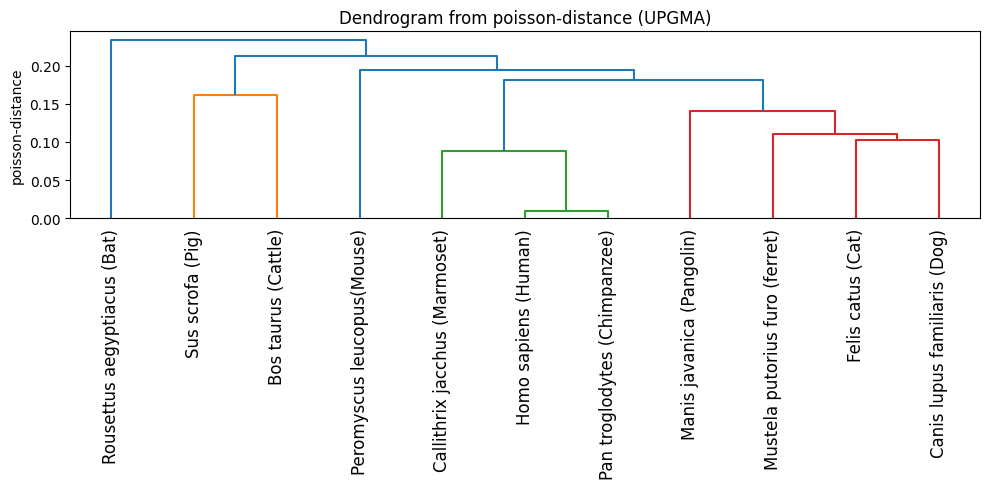

In [17]:
linkage_matrix = linkage(condensed, method='average')  # UPGMA

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=species_names, leaf_rotation=90)
plt.title("Dendrogram from poisson-distance (UPGMA)")
plt.ylabel("poisson-distance")
plt.tight_layout()
plt.show()

Print the computed average Poisson corrected distance in a Hierarchy

In [18]:
cluster_names = species_names
for each in linkage_matrix:
    org_1 = int(each[0])
    org_2 = int(each[1])
    score = each[2]
    cluster_names.append(f"{species_names[org_1]} & {species_names[org_2]}")
    print("Cluster 1:", species_names[org_1])
    print("Cluster 2:", species_names[org_2])
    print("Poisson-Corrected Distance:", score)
    print()

Cluster 1: Homo sapiens (Human)
Cluster 2: Pan troglodytes (Chimpanzee)
Poisson-Corrected Distance: 0.009987598628348306

Cluster 1: Callithrix jacchus (Marmoset)
Cluster 2: Homo sapiens (Human) & Pan troglodytes (Chimpanzee)
Poisson-Corrected Distance: 0.08757641902365881

Cluster 1: Felis catus (Cat)
Cluster 2: Canis lupus familiaris (Dog)
Poisson-Corrected Distance: 0.10204925435417023

Cluster 1: Mustela putorius furo (ferret)
Cluster 2: Felis catus (Cat) & Canis lupus familiaris (Dog)
Poisson-Corrected Distance: 0.11097052579576702

Cluster 1: Manis javanica (Pangolin)
Cluster 2: Mustela putorius furo (ferret) & Felis catus (Cat) & Canis lupus familiaris (Dog)
Poisson-Corrected Distance: 0.13995278099852798

Cluster 1: Sus scrofa (Pig)
Cluster 2: Bos taurus (Cattle)
Poisson-Corrected Distance: 0.1620789500230524

Cluster 1: Callithrix jacchus (Marmoset) & Homo sapiens (Human) & Pan troglodytes (Chimpanzee)
Cluster 2: Manis javanica (Pangolin) & Mustela putorius furo (ferret) & Fel

### Dendrogram Analysis

The dendrogram was constructed based on the Poisson-corrected p-distances of the ACE2 orthologs among various species. In this context, shorter branch lengths represent greater sequence similarity, indicating a closer genetic relationship.

Notably, Homo sapiens (human) and Pan troglodytes (chimpanzee) exhibit an exceptionally close relationship, with a Poisson-corrected distance of only 0.0099, reflecting minimal divergence in their ACE2 sequences. This human–chimpanzee cluster is then most closely related to Callithrix jacchus (marmoset), with a distance of 0.0875, indicating a broader but still relatively close evolutionary relationship among these primates.

A separate cluster is formed by Felis catus (cat) and Canis lupus familiaris (dog), which show moderate ACE2 similarity with a distance of 0.1020. This pair is further joined by Mustela putorius furo (ferret), forming a broader carnivore cluster at a distance of 0.1110. Subsequently, Manis javanica (pangolin) merges with this carnivore group at a distance of 0.1400, suggesting a more distant but still related ACE2 sequence.

The ungulates, Sus scrofa (pig) and Bos taurus (cattle), form a distinct cluster with a Poisson-corrected distance of 0.1621, reflecting their closer evolutionary relationship within Artiodactyla.

As the tree expands, the primate cluster (marmoset, human, and chimpanzee) merges with the carnivore–pangolin group at a distance of 0.1809, indicating a more ancient common ancestry among these eutherian mammals. This combined group is then joined by Peromyscus leucopus (mouse) at a distance of 0.1943, followed by the addition of the pig–cattle cluster at 0.2125.

Finally, Rousettus aegyptiacus (bat) appears as the most evolutionarily distant species in the dendrogram, joining the rest of the taxa at a Poisson-corrected distance of 0.2331. This highlights the divergence of bat ACE2 sequences from those of the other mammals analyzed, possibly reflecting adaptations unique to Chiroptera or functional differences in ACE2 relevant to species-specific viral entry.

Overall, the dendrogram not only reflects well-established evolutionary relationships among these mammals but also offers insights into ACE2 sequence conservation and divergence, which may have implications for host susceptibility to ACE2-binding viruses such as SARS-CoV-2.